In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
'''The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first. Complaints referred to other regulators, such as complaints about depository institutions with less than $10 billion in assets, are not published in the Consumer Complaint Database.'''

'The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first. Complaints referred to other regulators, such as complaints about depository institutions with less than $10 billion in assets, are not published in the Consumer Complaint Database.'

In [3]:
complaints_df = pd.DataFrame()
cols = ['Date received', 
        'Product', 
        'Sub-product', 
        'Issue', 
        'Sub-issue',
        'Consumer complaint narrative', 
        'Company public response', 
        'Company', 
        'State', 
        'Date sent to company', 
        'Company response to consumer', 
        'Timely response?', 
        'Consumer disputed?']
for c in pd.read_csv('data/Consumer_Complaints.csv', chunksize = 10000, header=0, usecols=cols):
    complaints_df = complaints_df.append(c)

In [4]:
complaints_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,09/20/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"CCS Financial Services, Inc.",IL,09/20/2019,Closed with explanation,Yes,NaN
1,09/20/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with fraud alerts or security freezes,NaN,NaN,NaN,"ONEMAIN FINANCIAL HOLDINGS, LLC.",WA,09/20/2019,In progress,Yes,NaN
2,09/20/2019,Checking or savings account,Checking account,Managing an account,Problem accessing account,NaN,NaN,ALLY FINANCIAL INC.,CA,09/20/2019,In progress,Yes,NaN
3,09/20/2019,Debt collection,Medical debt,Attempts to collect debt not owed,Debt was result of identity theft,NaN,NaN,"Commonwealth Financial Systems, Inc.",NV,09/20/2019,Closed with explanation,Yes,NaN
4,09/20/2019,"Payday loan, title loan, or personal loan",Payday loan,Can't stop withdrawals from your bank account,NaN,NaN,NaN,"Tennessee Quick Cash, Inc.",TN,09/20/2019,In progress,Yes,NaN


In [5]:
print(str(complaints_df.iloc[-1, 0]) + ' - ' + str(complaints_df.iloc[0, 0]))

12/01/2011 - 09/20/2019


### Get complaints from years January 1, 2012 through June 30, 2019

In [6]:
complaints_df['Date received'] = pd.to_datetime(complaints_df['Date received'], format='%m/%d/%Y')
complaints_df['Date sent to company'] = pd.to_datetime(complaints_df['Date sent to company'], format='%m/%d/%Y')
complaints_df_cut = complaints_df[(complaints_df['Date received'] >= pd.to_datetime('01/01/2012', format='%m/%d/%Y')) &
           (complaints_df['Date received'] <= pd.to_datetime('06/30/2019', format='%m/%d/%Y'))]
print(str(complaints_df_cut.iloc[-1, 0]) + ' - ' + str(complaints_df_cut.iloc[0, 0]))

2012-01-01 00:00:00 - 2019-06-30 00:00:00


In [7]:
df_equifax = complaints_df_cut[complaints_df_cut['Company'] == 'EQUIFAX, INC.']
equifax_complaints = df_equifax['Date received'].value_counts()
equifax_complaints = df_equifax.groupby(by=[df_equifax['Date received'].dt.year, 
                                            df_equifax['Date received'].dt.month])['Date received'].value_counts()
equifax_complaints = equifax_complaints.groupby([equifax_complaints.index.get_level_values(0),
                                                equifax_complaints.index.get_level_values(1)]).sum()

In [8]:
print(str(df_equifax.iloc[-1, 0]) + ' - ' + str(df_equifax.iloc[0, 0]))

2012-10-14 00:00:00 - 2019-06-30 00:00:00


In [9]:
equifax_complaints

Date received  Date received
2012           10                127
               11                265
               12                230
2013           1                 271
               2                 372
                                ... 
2019           2                2571
               3                3206
               4                3145
               5                3339
               6                3518
Name: Date received, Length: 81, dtype: int64

In [10]:
equifax_complaints_index = pd.to_datetime({'year': equifax_complaints.index.get_level_values(0),
                                           'month': equifax_complaints.index.get_level_values(1),
                                           'day': 1})

c:\users\suber\onedrive\documents\workspace\python\ataglance\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


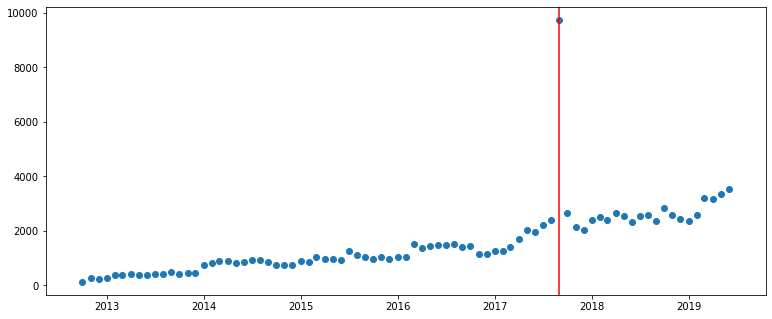

In [11]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_axes([0,0,1,1])
ax.scatter(y = equifax_complaints, x = equifax_complaints_index)
ax.axvline(x=pd.to_datetime('09/01/2017', format='%m/%d/%Y'), color='r')

plt.show()

## Which Financial Institutions have the most complaints per consumer account

In [60]:
import os
accnts_df = pd.DataFrame()
directory = 'data/transaction_accounts'
for file in os.listdir(directory):
    quarter = pd.to_datetime(file.split('_')[2], format='%Y%m%d')
    temp_df = pd.read_csv(os.path.join(directory,file), header=0, usecols=['namehcr', 'trnipcoc'])
    temp_df = temp_df.dropna()
    temp_df['date'] = quarter
    accnts_df = accnts_df.append(temp_df)
accnts_df['date'] = accnts_df['date'].dt.to_period('Q')
accnts_df.columns = ['company', 'num_indivs', 'date']
accnts_df = pd.DataFrame(accnts_df.groupby(by=['date', 'company']).sum())

In [61]:
complaints_ser = complaints_df_cut[['Date received', 'Company']]
complaints_ser = complaints_ser.dropna()
complaints_ser.columns = ['date', 'company']
# Convert to counts for quarterly
complaints_ser = complaints_ser.groupby(by=[complaints_ser['date'].dt.to_period('Q'), 'company'])['date'].value_counts()
complaints_ser = complaints_ser.groupby([complaints_ser.index.get_level_values(0), complaints_ser.index.get_level_values(1)]).sum()
complaints_ser = pd.DataFrame(complaints_ser)
complaints_ser.columns = ['complaints']

In [74]:
company_complaints_df = accnts_df.join(complaints_ser, how='inner')

In [75]:
company_complaints_df['complaint_per_mil'] = (company_complaints_df['complaints']/company_complaints_df['num_indivs'])*1000000

In [93]:
company_complaints_df.loc[('2019Q2',)].sort_values(by='complaint_per_mil', ascending=False)

,num_indivs,complaints,complaint_per_mil
company,,,
AMERICAN EXPRESS COMPANY,837522,709,846.544927
SYNCHRONY FINANCIAL,3429000,1201,350.247886
CAPITAL ONE FINANCIAL CORPORATION,15680963,1804,115.043955
ALLY FINANCIAL INC.,3669000,284,77.405288
KEYCORP,1933765,138,71.363377
UNITED SERVICES AUTOMOBILE ASSOCIATION,9213533,347,37.661991
"CITIZENS FINANCIAL GROUP, INC.",8469121,274,32.352826
"SUNTRUST BANKS, INC.",13974680,312,22.326093
EASTERN BANK CORPORATION,230338,5,21.707230


In [92]:
company_complaints_df.xs('AMERICAN EXPRESS COMPANY', level=1, drop_level=False)

,,num_indivs,complaints,complaint_per_mil
date,company,,,
2012Q1,AMERICAN EXPRESS COMPANY,350872,197,561.458310
2012Q2,AMERICAN EXPRESS COMPANY,758940,211,278.019343
2012Q3,AMERICAN EXPRESS COMPANY,1098678,212,192.959175
2012Q4,AMERICAN EXPRESS COMPANY,1032123,319,309.071690
2013Q1,AMERICAN EXPRESS COMPANY,822553,290,352.560868
2013Q2,AMERICAN EXPRESS COMPANY,676213,276,408.155418
2013Q3,AMERICAN EXPRESS COMPANY,642862,277,430.885633
2013Q4,AMERICAN EXPRESS COMPANY,725114,270,372.355243
2014Q1,AMERICAN EXPRESS COMPANY,580463,333,573.679976
